<a href="https://colab.research.google.com/github/gjrkdgh0772/NLP-MOVIE_recommendation/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EA%B8%8D%EC%A0%95_%EB%B6%80%EC%A0%95_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# 네이버 영화 긍정/부정 분석연습

# 파이썬 코랩 konlpy 설치

In [ ]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 !pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk1.8.0_91\bin"

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64

In [ ]:
! pip install JPype1
! pip install konlpy
! pip install nltk
! pip install tweepy
! pip install kss

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

ModuleNotFoundError: ignored

#네이버 영화 평점 크롤링 해오기

In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
data = req.get("https://movie.naver.com/movie/point/af/list.naver?&page=1")
soup = bs(data.text,"lxml")
print(soup)

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 " property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="평점 : 네이버 영화" property="og:title"/>
<meta content="네티즌 평점과 리뷰 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/point/af/list.naver?&amp;page=1" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content="https://mo

In [ ]:
tbody = soup.find_all("tbody")
review = tbody[0].text.split("\n\n\n")

In [ ]:
review_list = []

for i in range(len(review)):
    review_list.append(review[i].strip())

'17992356\n\n애덤 프로젝트\n\n별점 - 총 10점 중10\n\n데드풀의 금쪽이 상담소 내가 넘좋아하는 두배우 봐서 그걸로 만족 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고\n\ntlsg****22.03.13'

# 페이지를 여러개 해서 가져오기!

# 최근영화중 이상한 나라의 수학자 평점 전부 가져오기

In [ ]:
review_list =[]
num_list = []

for page in range(1,100,1):
    res = req.get(f"https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=190991&target=after&page={page}")
    soup = bs(res.text,"lxml")
    tbody = soup.find_all("tbody")
    review = tbody[0].text.split("\n\n\n")
    
    for i in range(len(review)):

        review_list.append(review[i].strip())

review_list

['17992375\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중8\n\n수학만이 아닌 다른걸 느꼈습니다. \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고\n\nlhh3****22.03.13',
 '17992372\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중9\n\n추웠더 겨울 얼음 녹으니 물이되고  봄이 찾아왔다.(문과.이과) 좋은 영화한편으로 비그친 늦은 휴일 바흐음악에 취해 감동으로 물들것다. \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고\n\n1101****22.03.13',
 '17992364\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중6\n\n평범한 영화 수학이나 북한은 다릌걸로 대체 가능 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고\n\ntanh****22.03.13',
 '17992358\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중8\n\n여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다. \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고\n\npres****22.03.13',
 '17992344\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중10\n\n오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게  보여준 영화이다 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고\n\nceng****22.03.13',
 '17992340\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중2\n\n영화보다는 드라마에 가까웠지만 연기가 한몫했다고 본다 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t

In [ ]:
len(review_list)

1033

# 데이터 프레임으로 만들기

In [ ]:
이상한나라의수학자 = pd.DataFrame(review_list)

In [ ]:
이상한나라의수학자

,0
0,17992375\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중8\n\n수학...
1,17992372\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중9\n\n추웠...
2,17992364\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중6\n\n평범...
3,17992358\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중8\n\n여자...
4,17992344\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중10\n\n오...
...,...
1028,17986921\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중10\n\n믿...
1029,17986919\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중10\n\n엄...
1030,17324180\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중10\n\n다...
1031,17324180\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중10\n\n다...


# 컬럼 구분하기

In [ ]:
train  = 이상한나라의수학자.copy()

In [ ]:
train

,0
0,17992375\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중8\n\n수학...
1,17992372\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중9\n\n추웠...
2,17992364\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중6\n\n평범...
3,17992358\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중8\n\n여자...
4,17992344\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중10\n\n오...
...,...
1028,17986921\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중10\n\n믿...
1029,17986919\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중10\n\n엄...
1030,17324180\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중10\n\n다...
1031,17324180\n\n이상한 나라의 수학자\n\n별점 - 총 10점 중10\n\n다...


In [ ]:
train[0].str.split('\n\n').tolist()

[['17992375',
  '이상한 나라의 수학자',
  '별점 - 총 10점 중8',
  '수학만이 아닌 다른걸 느꼈습니다. \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고',
  'lhh3****22.03.13'],
 ['17992372',
  '이상한 나라의 수학자',
  '별점 - 총 10점 중9',
  '추웠더 겨울 얼음 녹으니 물이되고  봄이 찾아왔다.(문과.이과) 좋은 영화한편으로 비그친 늦은 휴일 바흐음악에 취해 감동으로 물들것다. \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고',
  '1101****22.03.13'],
 ['17992364',
  '이상한 나라의 수학자',
  '별점 - 총 10점 중6',
  '평범한 영화 수학이나 북한은 다릌걸로 대체 가능 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고',
  'tanh****22.03.13'],
 ['17992358',
  '이상한 나라의 수학자',
  '별점 - 총 10점 중8',
  '여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다. \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고',
  'pres****22.03.13'],
 ['17992344',
  '이상한 나라의 수학자',
  '별점 - 총 10점 중10',
  '오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게  보여준 영화이다 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고',
  'ceng****22.03.13'],
 ['17992340',
  '이상한 나라의 수학자',
  '별점 - 총 10점 중2',
  '영화보다는 드라마에 

In [ ]:
train = train[0].str.split('\n\n').tolist()


In [ ]:
train = pd.DataFrame(train, columns=['index','title','grade','review','id'])

In [ ]:
train['review'][0]

'수학만이 아닌 다른걸 느꼈습니다. \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고'

In [ ]:
train['review'] =  train['review'].str.split(' \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t신고').tolist()

In [ ]:
train['review']

0                                  [수학만이 아닌 다른걸 느꼈습니다., ]
1       [추웠더 겨울 얼음 녹으니 물이되고  봄이 찾아왔다.(문과.이과) 좋은 영화한편으로...
2                          [평범한 영화 수학이나 북한은 다릌걸로 대체 가능, ]
3       [여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다...
4            [오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게  보여준 영화이다, ]
                              ...                        
1028                                      [믿고보는 영화입니다., ]
1029                                     [엄청난.명작인것같습니다, ]
1030                                        [다시봐도 잼밌다!, ]
1031                                        [다시봐도 잼밌다!, ]
1032                                        [다시봐도 잼밌다!, ]
Name: review, Length: 1033, dtype: object

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1033 non-null   object
 1   title   1033 non-null   object
 2   grade   963 non-null    object
 3   review  893 non-null    object
 4   id      893 non-null    object
dtypes: object(5)
memory usage: 40.5+ KB


# train review 널값 제거 한줄평 안남긴 사람들

In [ ]:
한줄평남긴데이터 = train[train['review'].isna() == False]

In [ ]:
 한줄평남긴데이터 = 한줄평남긴데이터.reset_index(drop=True)

In [ ]:
한줄평남긴데이터

,index,title,grade,review,id
0,17992375,이상한 나라의 수학자,별점 - 총 10점 중8,"[수학만이 아닌 다른걸 느꼈습니다., ]",lhh3****22.03.13
1,17992372,이상한 나라의 수학자,별점 - 총 10점 중9,[추웠더 겨울 얼음 녹으니 물이되고 봄이 찾아왔다.(문과.이과) 좋은 영화한편으로...,1101****22.03.13
2,17992364,이상한 나라의 수학자,별점 - 총 10점 중6,"[평범한 영화 수학이나 북한은 다릌걸로 대체 가능, ]",tanh****22.03.13
3,17992358,이상한 나라의 수학자,별점 - 총 10점 중8,[여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다...,pres****22.03.13
4,17992344,이상한 나라의 수학자,별점 - 총 10점 중10,"[오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게 보여준 영화이다, ]",ceng****22.03.13
...,...,...,...,...,...
888,17986921,이상한 나라의 수학자,별점 - 총 10점 중10,"[믿고보는 영화입니다., ]",kosu****22.03.09
889,17986919,이상한 나라의 수학자,별점 - 총 10점 중10,"[엄청난.명작인것같습니다, ]",ttte****22.03.09
890,17324180,이상한 나라의 수학자,별점 - 총 10점 중10,"[다시봐도 잼밌다!, ]",pola****21.01.03
891,17324180,이상한 나라의 수학자,별점 - 총 10점 중10,"[다시봐도 잼밌다!, ]",pola****21.01.03


In [ ]:
한줄평남긴데이터['re'] = 0

In [ ]:
for i in range(len(한줄평남긴데이터['review'])):

    한줄평남긴데이터['re'][i] = 한줄평남긴데이터['review'][i][0]
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
한줄평남긴데이터

,index,title,grade,review,id,re
0,17992375,이상한 나라의 수학자,별점 - 총 10점 중8,"[수학만이 아닌 다른걸 느꼈습니다., ]",lhh3****22.03.13,수학만이 아닌 다른걸 느꼈습니다.
1,17992372,이상한 나라의 수학자,별점 - 총 10점 중9,[추웠더 겨울 얼음 녹으니 물이되고 봄이 찾아왔다.(문과.이과) 좋은 영화한편으로...,1101****22.03.13,추웠더 겨울 얼음 녹으니 물이되고 봄이 찾아왔다.(문과.이과) 좋은 영화한편으로 ...
2,17992364,이상한 나라의 수학자,별점 - 총 10점 중6,"[평범한 영화 수학이나 북한은 다릌걸로 대체 가능, ]",tanh****22.03.13,평범한 영화 수학이나 북한은 다릌걸로 대체 가능
3,17992358,이상한 나라의 수학자,별점 - 총 10점 중8,[여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다...,pres****22.03.13,여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다.
4,17992344,이상한 나라의 수학자,별점 - 총 10점 중10,"[오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게 보여준 영화이다, ]",ceng****22.03.13,오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게 보여준 영화이다
...,...,...,...,...,...,...
888,17986921,이상한 나라의 수학자,별점 - 총 10점 중10,"[믿고보는 영화입니다., ]",kosu****22.03.09,믿고보는 영화입니다.
889,17986919,이상한 나라의 수학자,별점 - 총 10점 중10,"[엄청난.명작인것같습니다, ]",ttte****22.03.09,엄청난.명작인것같습니다
890,17324180,이상한 나라의 수학자,별점 - 총 10점 중10,"[다시봐도 잼밌다!, ]",pola****21.01.03,다시봐도 잼밌다!
891,17324180,이상한 나라의 수학자,별점 - 총 10점 중10,"[다시봐도 잼밌다!, ]",pola****21.01.03,다시봐도 잼밌다!


# 필요한 데이터만 뽑기

In [ ]:
data = 한줄평남긴데이터[['grade','re','id']]

In [ ]:
data.head()

,grade,re,id
0,별점 - 총 10점 중8,수학만이 아닌 다른걸 느꼈습니다.,lhh3****22.03.13
1,별점 - 총 10점 중9,추웠더 겨울 얼음 녹으니 물이되고 봄이 찾아왔다.(문과.이과) 좋은 영화한편으로 ...,1101****22.03.13
2,별점 - 총 10점 중6,평범한 영화 수학이나 북한은 다릌걸로 대체 가능,tanh****22.03.13
3,별점 - 총 10점 중8,여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다.,pres****22.03.13
4,별점 - 총 10점 중10,오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게 보여준 영화이다,ceng****22.03.13


# 평점만 살리기

In [ ]:
grade = data['grade'].str.split('별점 - 총 10점 중').tolist()

In [ ]:
len(grade)

893

In [ ]:
for i in range(len(grade)):

    data['grade'][i] = grade[i][1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# id와 날짜 구분하기

In [ ]:
data['date']=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['id']

0      lhh3****22.03.13
1      1101****22.03.13
2      tanh****22.03.13
3      pres****22.03.13
4      ceng****22.03.13
             ...       
888    kosu****22.03.09
889    ttte****22.03.09
890    pola****21.01.03
891    pola****21.01.03
892    pola****21.01.03
Name: id, Length: 893, dtype: object

In [ ]:
data['id'].str.split('*')

0      [lhh3, , , , 22.03.13]
1      [1101, , , , 22.03.13]
2      [tanh, , , , 22.03.13]
3      [pres, , , , 22.03.13]
4      [ceng, , , , 22.03.13]
                ...          
888    [kosu, , , , 22.03.09]
889    [ttte, , , , 22.03.09]
890    [pola, , , , 21.01.03]
891    [pola, , , , 21.01.03]
892    [pola, , , , 21.01.03]
Name: id, Length: 893, dtype: object

In [ ]:
id_date = data['id'].str.split('*')

In [ ]:
id_date[0][0]   #id
id_date[0][4]   #날짜

'22.03.13'

In [ ]:
for i in range(len(id_date)):
    data['date'][i] = id_date[i][4]
    data['id'][i] = id_date[i][0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can 

In [ ]:
data.head()

,grade,re,id,date
0,8,수학만이 아닌 다른걸 느꼈습니다.,lhh3,22.03.13
1,9,추웠더 겨울 얼음 녹으니 물이되고 봄이 찾아왔다.(문과.이과) 좋은 영화한편으로 ...,1101,22.03.13
2,6,평범한 영화 수학이나 북한은 다릌걸로 대체 가능,tanh,22.03.13
3,8,여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다.,pres,22.03.13
4,10,오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게 보여준 영화이다,ceng,22.03.13


#데이터 중복유무 확인

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   grade   893 non-null    object
 1   re      893 non-null    object
 2   id      893 non-null    object
 3   date    893 non-null    object
dtypes: object(4)
memory usage: 28.0+ KB


In [ ]:
data['date'].unique()

array(['22.03.13', '22.03.12', '22.03.11', '22.03.10', '22.03.09',
       '21.01.03'], dtype=object)

In [ ]:
data['re'].nunique(), data['id'].nunique(), data['date'].nunique()

(890, 824, 6)

## 같은 평만 3개 중복 제거 id,날짜 제외

In [ ]:
data.drop_duplicates(subset=['re'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   grade   890 non-null    object
 1   re      890 non-null    object
 2   id      890 non-null    object
 3   date    890 non-null    object
dtypes: object(4)
memory usage: 34.8+ KB


In [ ]:
data.head()

,grade,re,id,date
0,8,수학만이 아닌 다른걸 느꼈습니다.,lhh3,22.03.13
1,9,추웠더 겨울 얼음 녹으니 물이되고 봄이 찾아왔다.(문과.이과) 좋은 영화한편으로 ...,1101,22.03.13
2,6,평범한 영화 수학이나 북한은 다릌걸로 대체 가능,tanh,22.03.13
3,8,여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다.,pres,22.03.13
4,10,오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게 보여준 영화이다,ceng,22.03.13


In [ ]:
data['re'].tolist()

['수학만이 아닌 다른걸 느꼈습니다.',
 '추웠더 겨울 얼음 녹으니 물이되고  봄이 찾아왔다.(문과.이과) 좋은 영화한편으로 비그친 늦은 휴일 바흐음악에 취해 감동으로 물들것다.',
 '평범한 영화 수학이나 북한은 다릌걸로 대체 가능',
 '여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다.',
 '오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게  보여준 영화이다',
 '영화보다는 드라마에 가까웠지만 연기가 한몫했다고 본다',
 '재밌었어요 배우들도 연기 잘하고요',
 '오랜만에 온가족이 함께봤어요 재미있고 감동적이네요',
 '역대급 유치함에 폭소했습니다.. 스토리 개연성도 황당무계하고 하나하나 유치해서 웃음만 나올뿐..',
 '기대없이 봤는데 역시 연기가 ㅠㅠ 너무 재밌었어요',
 '최민식 때문에 봤어요실망입니다',
 '수포자들이여 당신들은 죄가 없습니다.',
 '시나리오 연출력 .. 쓰레기 돈아깝다',
 '최민식 배우님 연기진짜잘하시네요..와',
 '느그 교장 청담동 살제? 내가 임마 어저께도 느그 교장이랑 밥도 같이 먹고 사우나도 같이 가고 마 다 했어 (담임선생이 경비인 학성을 해고시키려고 하자 화를 내며)',
 '수학공부 하고 싶어지는 영화',
 '잔잔하고 수학에 대해 다시 한번 생각하게 해주는 좋은 영화네요.',
 '감동 감동 명대사 많아요파이 피아노 넝  아름다왔어요~~^^',
 '그놈의 탈북자..   북한 미화영화',
 '오랜만에 잔잔한 영화 감동도 있고 아이와 잘봤습니다',
 '의도는 좋앗는데  수학의 아름답다 햇는데  표현은  부족햇다',
 '따뜻한 감성을 주는 스토리긴한데뻔한  억지스러운 부분도 잇어요그냥  부담없이 보는 영화 ?',
 '조용히 영화에 몰입했다. 힐링하기 좋은영화.최민식은 정말 연기 스팩트럼이 넓다.',
 '너무 재밌게 봤습니다!',
 '수학에 대해서 신기했고 너무 영화가 좋았어요',
 '영화 내용이 참 의미있고 좋은 영화다만 스토리가 뻔해서 어떻게 흘러갈지 대충 예상이됩니다예고편을 

In [ ]:
data.to_csv('영화평점리뷰.csv',index=False)

In [ ]:
dafasdfasdfasdfasdfasdf

# 토큰화하기

# MECAB

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
data = pd.read_csv('/content/영화평점리뷰.csv')

In [ ]:
data.head()

,grade,re,id,date
0,8,수학만이 아닌 다른걸 느꼈습니다.,lhh3,22.03.13
1,9,추웠더 겨울 얼음 녹으니 물이되고 봄이 찾아왔다.(문과.이과) 좋은 영화한편으로 ...,1101,22.03.13
2,6,평범한 영화 수학이나 북한은 다릌걸로 대체 가능,tanh,22.03.13
3,8,여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다.,pres,22.03.13
4,10,오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게 보여준 영화이다,ceng,22.03.13


In [ ]:
data['grade'][data['grade']<=6]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['grade'][data['grade']>6]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data

,grade,re,id,date
0,1,수학만이 아닌 다른걸 느꼈습니다.,lhh3,22.03.13
1,1,추웠더 겨울 얼음 녹으니 물이되고 봄이 찾아왔다.(문과.이과) 좋은 영화한편으로 ...,1101,22.03.13
2,0,평범한 영화 수학이나 북한은 다릌걸로 대체 가능,tanh,22.03.13
3,1,여자애는 왜끝까지 입꾹하고있냐..결말이 너무 한순간이긴 하지만 잔잔하게 잘봤습니다.,pres,22.03.13
4,1,오랫만에 감동적인 영화어려운 수학을 감동적이고 아름답게 보여준 영화이다,ceng,22.03.13
...,...,...,...,...
885,1,만이보고싶네요..,ciwe,22.03.09
886,1,엄청난 감동이네요. 최민식의 연기는 역대급이구요.,xaxa,22.03.09
887,1,믿고보는 영화입니다.,kosu,22.03.09
888,1,엄청난.명작인것같습니다,ttte,22.03.09


In [ ]:
data['grade'].value_counts()

1    726
0    164
Name: grade, dtype: int64

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
review = data['re']

In [ ]:
import re
# from konlpy.tag import Okt
from konlpy.tag import Mecab
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize

def my_stopword(text,tokenizer):    
    #stopwords = ['이번','에','을', '를', '이', '가', '은', '는']
    df = pd.read_csv("/content/gdrive/MyDrive/NLP/nlp_data/ko_stopword_dict.txt") #------ 기본 header=None
    list1 = df['아'].values.tolist()
    
    list2 = ['게','한','은', '갖', '고', '있']                           #------ 추가본
    stopwords = list1 + list2
    
    txt = re.sub('[^가-힣a-z]', ' ', text)
    # token = tokenizer.morphs(txt)
    mecab_morphs = mecab.morphs(txt)
    token = [t for t in mecab_morphs if t not in stopwords]
    return token

# tokenizer = Okt()
mecab = Mecab()

res_list = []
text_list = data['re']
print( len(text_list))

for i in range(len(text_list)):
    
    res= my_stopword(text_list[i],mecab)
    res_list.append(res)

        # print(text, '\n', sent)
        # print("품사 태깅:", res)
        # print("단어토근화:",mecab.nouns(sent))
    # print("----"*20)

890


In [ ]:
res_list

[['수학', '만', '아닌', '걸', '느꼈'],
 ['추웠',
  '더',
  '겨울',
  '얼음',
  '녹',
  '으니',
  '물',
  '되',
  '봄',
  '찾아왔',
  '다',
  '문',
  '이과',
  '좋',
  '영화',
  '한편',
  '비',
  '그친',
  '늦',
  '휴일',
  '바흐',
  '음악',
  '취해',
  '감동',
  '물들',
  '것다'],
 ['평범', '영화', '수학', '이나', '북한', '다', '릌걸로', '대체', '가능'],
 ['여자', '애', '는', '끝', '입', '꾹', '냐', '결말', '너무', '순간', '긴', '잔잔', '잘', '봤'],
 ['오랫만',
  '감동',
  '적',
  '인',
  '영화',
  '어려운',
  '수학',
  '감동',
  '적',
  '아름답',
  '보여준',
  '영화',
  '다'],
 ['영화', '보다', '는', '드라마', '가까웠', '연기', '한몫', '했', '다고', '본다'],
 ['재밌', '었', '어요', '배우', '도', '연기', '잘', '고요'],
 ['오랜만', '온', '가족', '봤', '어요', '재미있', '감동', '적', '네요'],
 ['역대',
  '급',
  '유치',
  '함',
  '폭소',
  '했',
  '스토리',
  '개연',
  '성',
  '도',
  '황당무계',
  '하나하나',
  '유치',
  '해서',
  '웃음',
  '만',
  '나올',
  '뿐'],
 ['기대', '없이', '봤', '는데', '역시', '연기', '너무', '재밌', '었', '어요'],
 ['최민식', '때문', '봤', '어요', '실망', '입니다'],
 ['수포', '이여', '죄', '없'],
 ['시나리오', '연출력', '쓰레기', '돈', '아깝', '다'],
 ['최민식', '배우', '님', '연기', '진짜', '잘', '시', '네요'],
 ['

In [ ]:
print(len(res_list))
print(res_list[-1:])

890
[['다시', '봐도', '잼', '밌다']]


# 정수 인코딩

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(res_list)

In [ ]:
print(tokenizer.word_index)  #2408 끝자리 정수값

{'는': 1, '영화': 2, '도': 3, '최민식': 4, '좋': 5, '보': 6, '다': 7, '연기': 8, '수학': 9, '감동': 10, '배우': 11, '었': 12, '어요': 13, '았': 14, '적': 15, '봤': 16, '너무': 17, '네요': 18, '재밌': 19, '스토리': 20, '했': 21, '잘': 22, '는데': 23, '지': 24, '님': 25, '같': 26, '수': 27, '였': 28, '만': 29, '음': 30, '없': 31, '주': 32, '해': 33, '역시': 34, '되': 35, '인': 36, '정말': 37, '면': 38, '입니다': 39, '생각': 40, '않': 41, '싶': 42, '안': 43, '던': 44, '오랜만': 45, '잔잔': 46, '진짜': 47, '기': 48, '아': 49, '재미있': 50, '볼': 51, '따뜻': 52, '할': 53, '더': 54, '거': 55, '말': 56, '소재': 57, '최고': 58, '듯': 59, '느낌': 60, '해서': 61, '아요': 62, '라': 63, '북한': 64, '합니다': 65, '기대': 66, '학생': 67, '보다': 68, '함': 69, '많': 70, '가족': 71, '파이': 72, '부분': 73, '한국': 74, '인생': 75, '믿': 76, '시': 77, '신선': 78, '본': 79, '나라': 80, '지루': 81, '수학자': 82, '라는': 83, '마음': 84, '음악': 85, '내': 86, '드라마': 87, '이야기': 88, '전개': 89, '송': 90, '받': 91, '굿': 92, '연출': 93, '다는': 94, '답': 95, '알': 96, '다시': 97, '많이': 98, '겠': 99, '꼭': 100, '중': 101, '서': 102, '성': 103, '며': 104, '번': 105

# 등장 빈도수가 한번인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해보자

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 2408
등장 빈도가 1번 이하인 희귀 단어의 수: 1332
단어 집합에서 희귀 단어의 비율: 55.3156146179402
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.185573408730432


# 등장 빈도수가 한번인 단어들의 수를 제외한 단어의 개수를 단어 집합의 최대 크기로 제한하기

In [ ]:
# 전체 단어 개수 중 빈도수 하나인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1077


# 단어 집합의 크기는 1078개입니다. 이를 케라스 토크나이저의 인자로 넘겨주고 텍스트 시퀀스를 정수 시퀀스로 변환합니다.

In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(res_list)
review_list = tokenizer.texts_to_sequences(res_list)

### 정수 인코딩 샘플보기

In [ ]:
review_list[:5]

[[9, 29, 291, 198, 329],
 [54, 735, 388, 389, 35, 390, 7, 546, 5, 2, 547, 391, 548, 392, 85, 10],
 [330, 2, 9, 185, 64, 7, 393],
 [549, 331, 1, 121, 736, 332, 157, 17, 186, 46, 22, 16],
 [737, 10, 15, 36, 2, 261, 9, 10, 15, 129, 333, 2, 7]]

y_train 가져오기

In [ ]:
y_train = np.array(data['grade'])

In [ ]:
y_train

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

#빈 샘플(empty samples) 제거

###빈도수가 낮은 단어만으로 구성되었던 샘플들은 빈(empty) 샘플이 되었다는 것을 의미합니다

In [ ]:
drop_empty = [index for index, sentence in enumerate(review_list) if len(sentence) < 1]

In [ ]:
X_train = np.delete(review_list, drop_empty, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
y_train = np.delete(y_train, drop_empty, axis=0)

In [ ]:
print(len(X_train),len(y_train))

888 888


#### 샘플의수가 쪼금 줄어들었다

# 패딩

####서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 패딩 작업을 진행해보겠습니다. 전체 데이터에서 가장 길이가 긴 리뷰와 전체 데이터의 길이 분포를 알아보겠습니다.

리뷰의 최대 길이 : 164
리뷰의 평균 길이 : 14.829954954954955


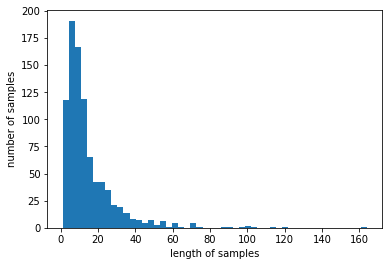

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 40
below_threshold_len(max_len,X_train)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 94.7072072072072


#### 전체 훈련 데이터 중 약 94%의 리뷰가 35이하의 길이를 가지는 것을 확인했습니다. 모든 샘플의 길이를 30으로 맞추겠습니다.

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=1234)

In [ ]:
X_train.shape, y_train.shape

((710, 40), (710,))

# LSTM으로 네이버 영화 리뷰 감성 분류하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM                 #RNN
# from keras.layers import Dense, Conv2D, MaxPool2D  #CNN
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, callbacks=[es, mc], batch_size=10, validation_split=0.2)

Epoch 1/50
57/57 [==============================] - ETA: 0s - loss: 0.5098 - acc: 0.8116
Epoch 1: val_acc improved from -inf to 0.82394, saving model to best_model.h5
57/57 [==============================] - 6s 54ms/step - loss: 0.5098 - acc: 0.8116 - val_loss: 0.4667 - val_acc: 0.8239
Epoch 2/50
57/57 [==============================] - ETA: 0s - loss: 0.4155 - acc: 0.8169
Epoch 2: val_acc did not improve from 0.82394
57/57 [==============================] - 2s 44ms/step - loss: 0.4155 - acc: 0.8169 - val_loss: 0.3768 - val_acc: 0.8239
Epoch 3/50
56/57 [============================>.] - ETA: 0s - loss: 0.3391 - acc: 0.8429
Epoch 3: val_acc improved from 0.82394 to 0.83803, saving model to best_model.h5
57/57 [==============================] - 3s 45ms/step - loss: 0.3363 - acc: 0.8451 - val_loss: 0.3782 - val_acc: 0.8380
Epoch 4/50
56/57 [============================>.] - ETA: 0s - loss: 0.2735 - acc: 0.8839
Epoch 4: val_acc improved from 0.83803 to 0.85211, saving model to best_model.h

# test로 예측해보기

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

6/6 [==============================] - 1s 18ms/step - loss: 0.4919 - acc: 0.8427

 테스트 정확도: 0.8427


# 리뷰 예측해보기

In [ ]:
mecab = Mecab()

res_list = []
text_list = data['re']
print( len(text_list))

for i in range(len(text_list)):
    
    res= my_stopword(text_list[i],mecab)
    res_list.append(res)


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = my_stopword(new_sentence,mecab) # 토큰화
#   new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict(' 영화')

63.72% 확률로 긍정 리뷰입니다.

